In [2]:
#Install and Import Libraries
!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

# Set styling
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
# Load Data
# Load your Instagram data 
df = pd.read_csv(r'C:\data analysis\Python\l\Instagram data.csv', encoding="latin-1")
# display first rws
display(df.head(3))

print("\n Column names:")
print(df.columns.tolist())

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...



 Column names:
['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows', 'Caption', 'Hashtags']


In [4]:
#  Clean Data
# Clean column names
df.columns = [str(col).strip().replace(' ', '_').replace('-', '_').lower() for col in df.columns]
print("✅ Column names cleaned")

# Fill missing values
df = df.fillna(0)

# Remove duplicates
initial_count = len(df)
df = df.drop_duplicates()
final_count = len(df)
print(f"✅ Removed {initial_count - final_count} duplicate rows")

print(f" Cleaned data: {len(df)} rows")
display(df.head(2))

✅ Column names cleaned
✅ Removed 17 duplicate rows
 Cleaned data: 102 rows


,impressions,from_home,from_hashtags,from_explore,from_other,saves,comments,shares,likes,profile_visits,follows,caption,hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


In [5]:
# Calculate Key Metrics
# Ensure required columns exist
required_cols = ['likes', 'comments', 'impressions']
for col in required_cols:
    if col not in df.columns:
        df[col] = 0

# Calculate engagement metrics
df['total_engagement'] = df['likes'] + df['comments']
if 'saves' in df.columns:
    df['total_engagement'] += df['saves']
if 'shares' in df.columns:
    df['total_engagement'] += df['shares']

df['engagement_rate'] = df['total_engagement'] / df['impressions']
df['engagement_rate'] = df['engagement_rate'].fillna(0)

print("✅ Key metrics calculated")
print(f" Average Engagement Rate: {df['engagement_rate'].mean():.2%}")

✅ Key metrics calculated
 Average Engagement Rate: 6.32%


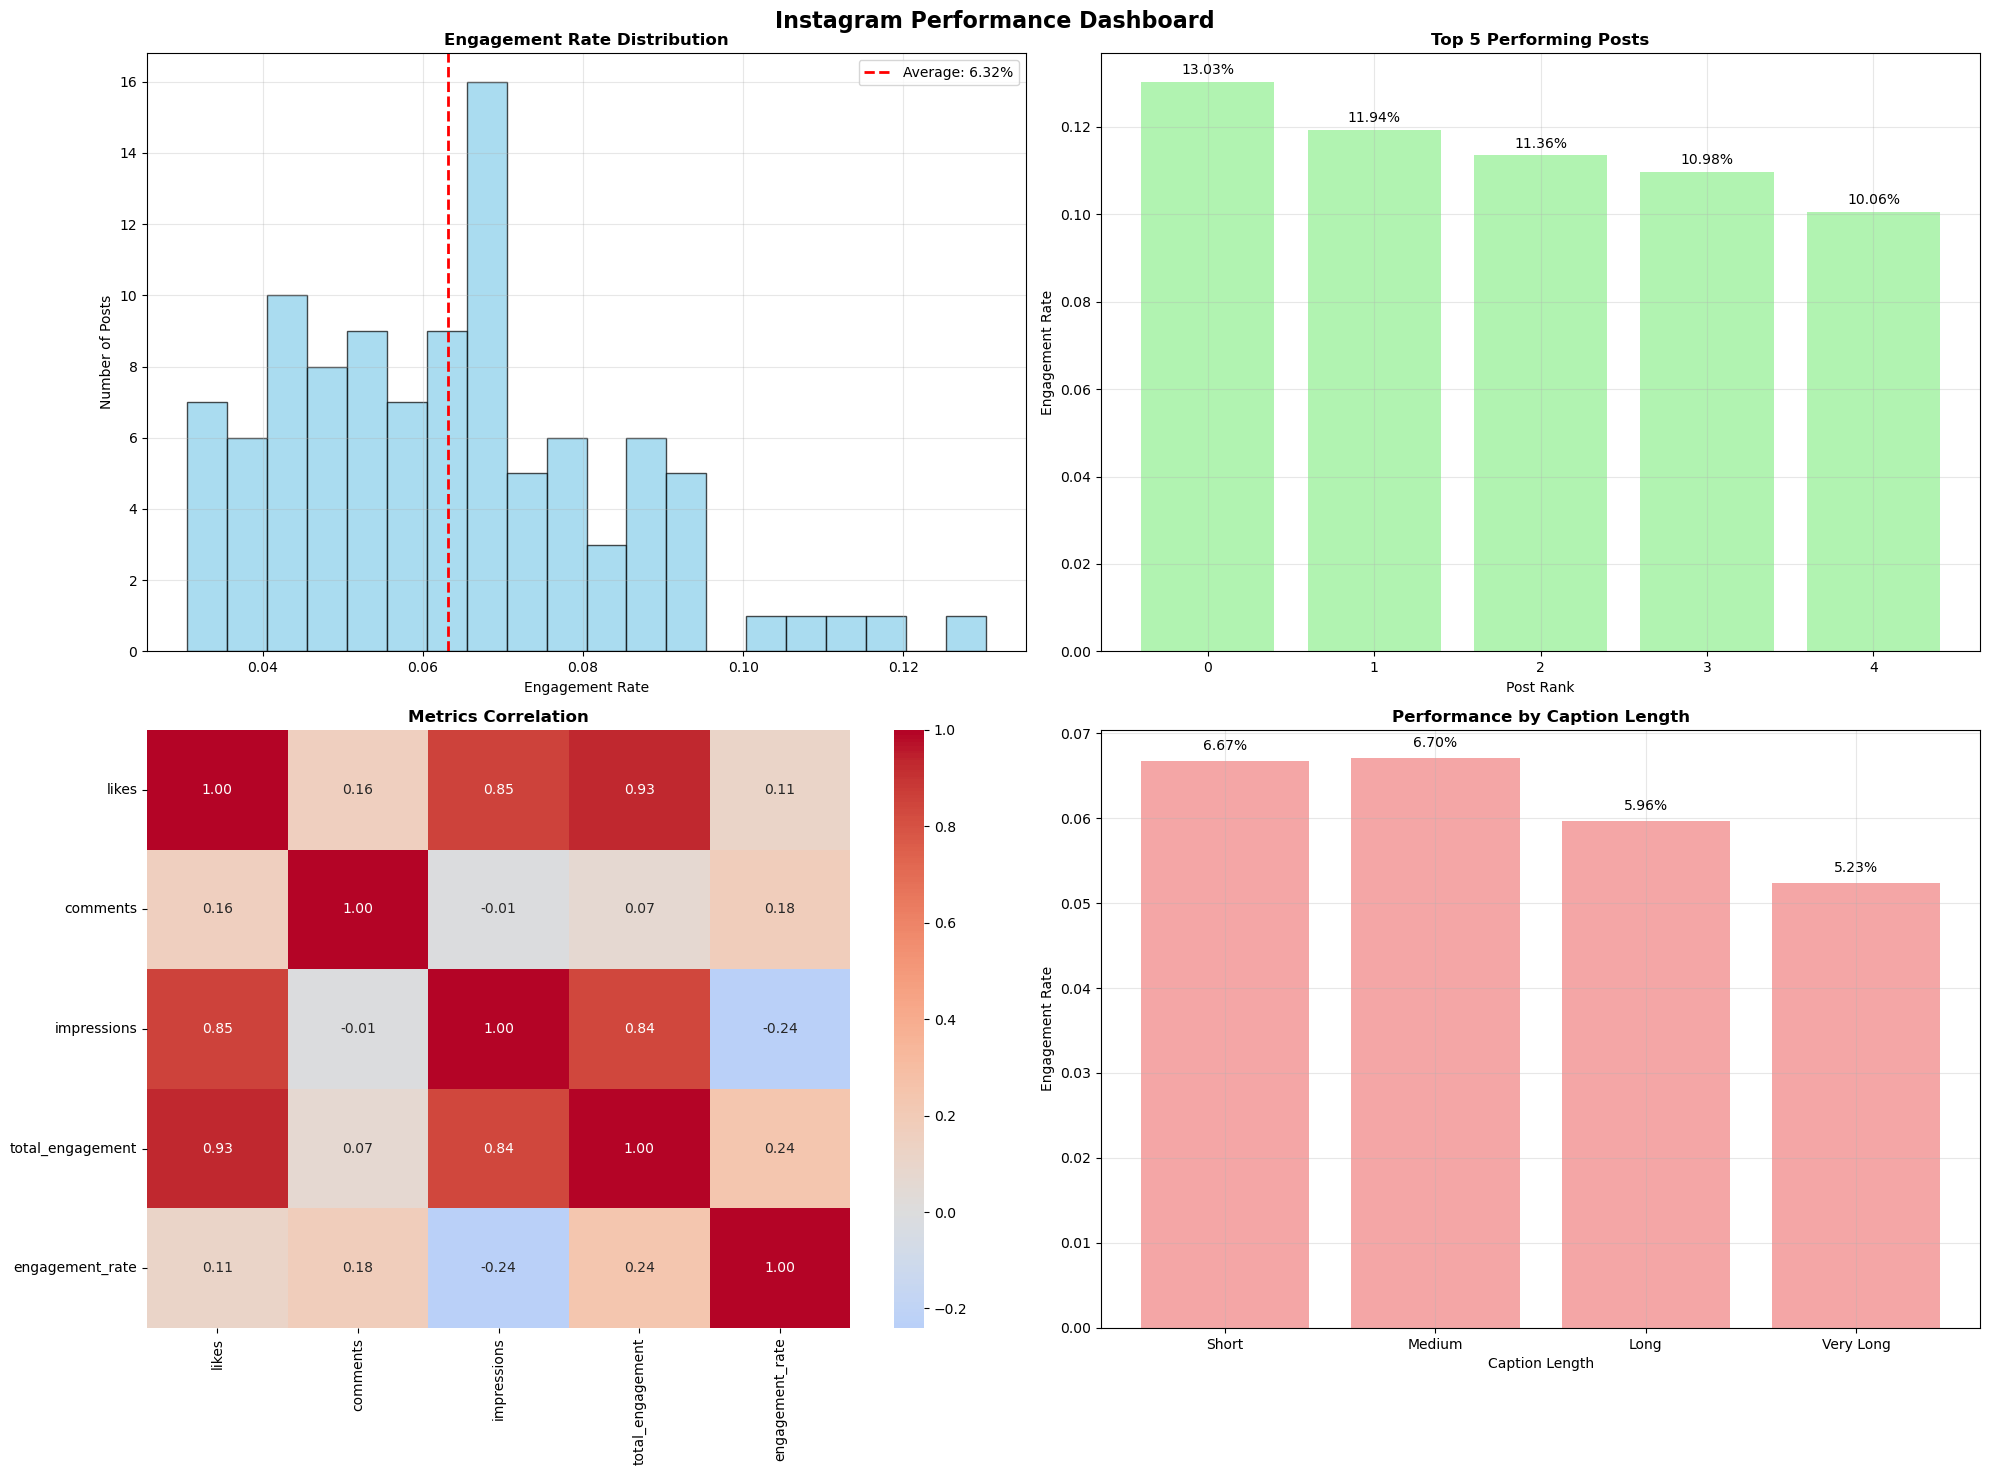

In [6]:
#  Performance Dashboard
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Instagram Performance Dashboard', fontsize=16, fontweight='bold')

# 1. Engagement Rate Distribution
engagement_rates = df[df['engagement_rate'] > 0]['engagement_rate']
ax1.hist(engagement_rates, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(engagement_rates.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Average: {engagement_rates.mean():.2%}')
ax1.set_xlabel('Engagement Rate')
ax1.set_ylabel('Number of Posts')
ax1.set_title('Engagement Rate Distribution', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Top Performing Posts
top_posts = df.nlargest(5, 'engagement_rate')[['engagement_rate', 'total_engagement']]
ax2.bar(range(len(top_posts)), top_posts['engagement_rate'], color='lightgreen', alpha=0.7)
ax2.set_xlabel('Post Rank')
ax2.set_ylabel('Engagement Rate')
ax2.set_title('Top 5 Performing Posts', fontweight='bold')
ax2.set_xticks(range(len(top_posts)))
ax2.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(top_posts['engagement_rate']):
    ax2.text(i, v + 0.001, f'{v:.2%}', ha='center', va='bottom')

# 3. Correlation Heatmap
numeric_cols = ['likes', 'comments', 'impressions', 'total_engagement', 'engagement_rate']
available_cols = [col for col in numeric_cols if col in df.columns]

if len(available_cols) > 1:
    corr_matrix = df[available_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax3, fmt='.2f')
    ax3.set_title('Metrics Correlation', fontweight='bold')

# 4. Content Performance
if 'caption' in df.columns:
    df['caption_length'] = df['caption'].str.len().fillna(0)
    df['length_category'] = pd.cut(df['caption_length'], 
                                  bins=[0, 50, 150, 500, float('inf')],
                                  labels=['Short', 'Medium', 'Long', 'Very Long'])
    
    length_performance = df.groupby('length_category', observed=False)['engagement_rate'].mean()
    ax4.bar(length_performance.index, length_performance.values, color='lightcoral', alpha=0.7)
    ax4.set_xlabel('Caption Length')
    ax4.set_ylabel('Engagement Rate')
    ax4.set_title('Performance by Caption Length', fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(length_performance.values):
        ax4.text(i, v + 0.001, f'{v:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

 Available columns: ['impressions', 'from_home', 'from_hashtags', 'from_explore', 'from_other', 'saves', 'comments', 'shares', 'likes', 'profile_visits', 'follows', 'caption', 'hashtags', 'total_engagement', 'engagement_rate', 'caption_length', 'length_category']


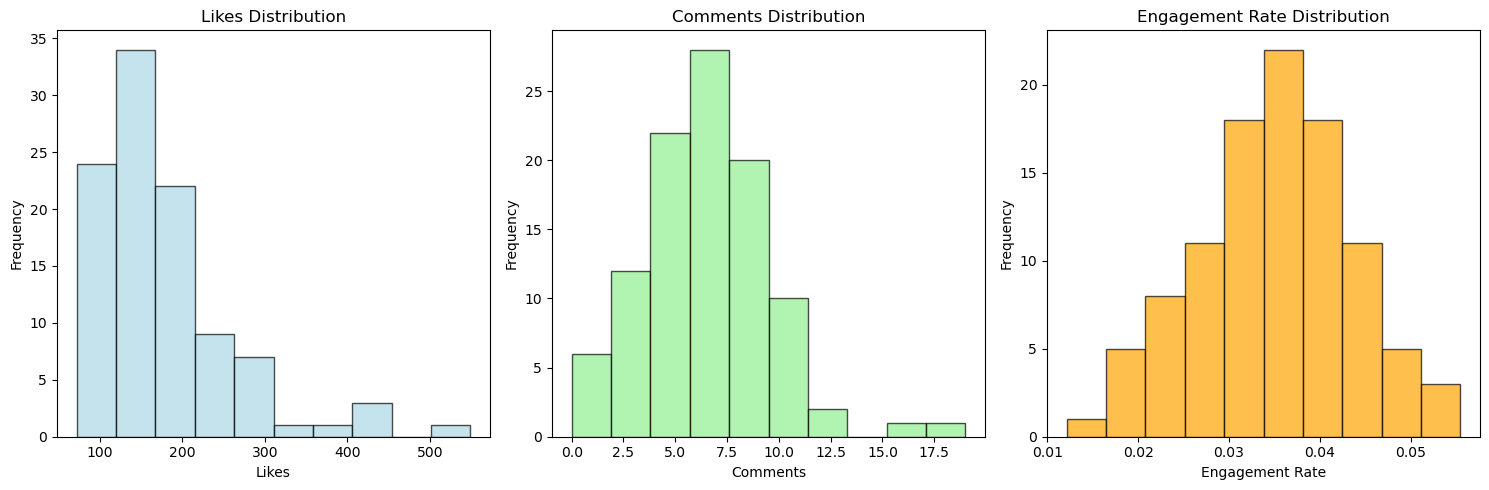

In [7]:
#  Alternative Content Analysis
# Check what columns we have
print(" Available columns:", df.columns.tolist())

# Create simple visualizations based on available data
plt.figure(figsize=(15, 5))

# Plot 1: Basic metrics distribution
if 'likes' in df.columns:
    plt.subplot(1, 3, 1)
    plt.hist(df['likes'], bins=10, color='lightblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Likes')
    plt.ylabel('Frequency')
    plt.title('Likes Distribution')

# Plot 2: Another metric
if 'comments' in df.columns:
    plt.subplot(1, 3, 2)
    plt.hist(df['comments'], bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
    plt.xlabel('Comments')
    plt.ylabel('Frequency')
    plt.title('Comments Distribution')

# Plot 3: Engagement rate if possible
if 'likes' in df.columns and 'impressions' in df.columns:
    plt.subplot(1, 3, 3)
    engagement = (df['likes'] + df.get('comments', 0)) / df['impressions']
    engagement = engagement.replace([np.inf, -np.inf], np.nan).dropna()
    if len(engagement) > 0:
        plt.hist(engagement, bins=10, color='orange', edgecolor='black', alpha=0.7)
        plt.xlabel('Engagement Rate')
        plt.ylabel('Frequency')
        plt.title('Engagement Rate Distribution')

plt.tight_layout()
plt.show()

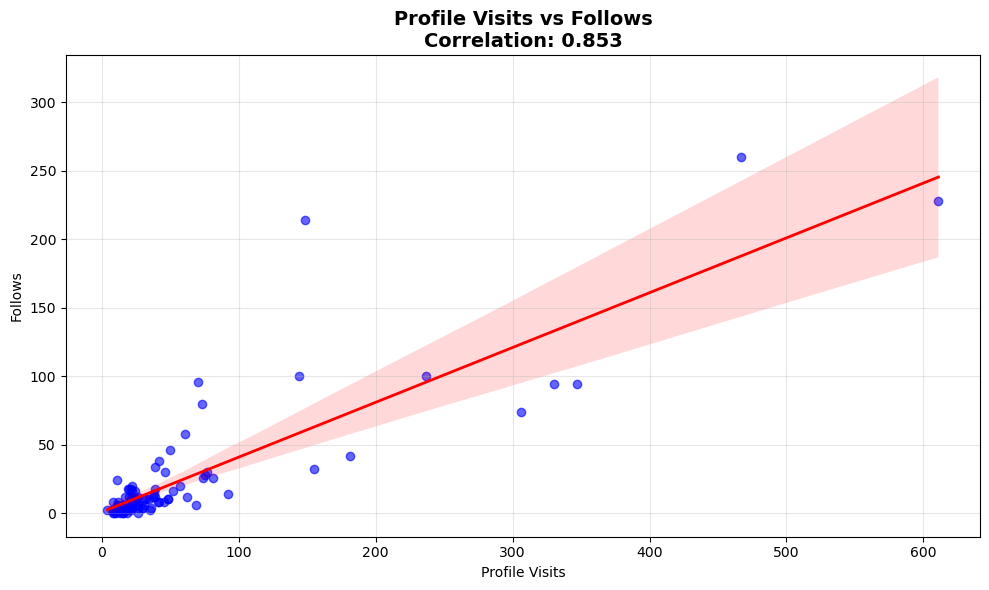

 Correlation between Profile Visits and Follows: 0.853
 STRONG positive relationship: Profile visits strongly convert to follows


In [8]:
# Correlation Visualization between Profile Visits and Follows

plt.figure(figsize=(10, 6))

# Create scatter plot with regression line
sns.regplot(x='profile_visits', y='follows', data=df, 
            scatter_kws={'alpha':0.6, 'color':'blue'},
            line_kws={'color':'red', 'linewidth':2})

# Calculate correlation
correlation = df['profile_visits'].corr(df['follows'])

plt.title(f'Profile Visits vs Follows\nCorrelation: {correlation:.3f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Profile Visits')
plt.ylabel('Follows')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print correlation interpretation
print(f" Correlation between Profile Visits and Follows: {correlation:.3f}")
if correlation > 0.7:
    print(" STRONG positive relationship: Profile visits strongly convert to follows")
elif correlation > 0.4:
    print(" MODERATE relationship: Profile visits somewhat lead to follows")
elif correlation > 0.2:
    print(" WEAK relationship: Some connection between visits and follows")
else:
    print(" Minimal relationship: Profile visits don't strongly predict follows")

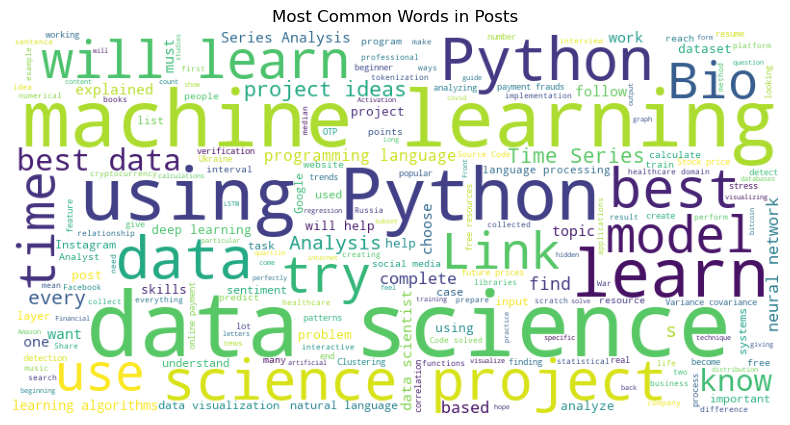

In [9]:
# Simple WordCloud

if 'caption' in df.columns:
    # Combine all captions
    all_text = ' '.join(df['caption'].astype(str))
    
    # Create WordCloud
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    
    # Display it
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('Most Common Words in Posts')
    plt.show()
    

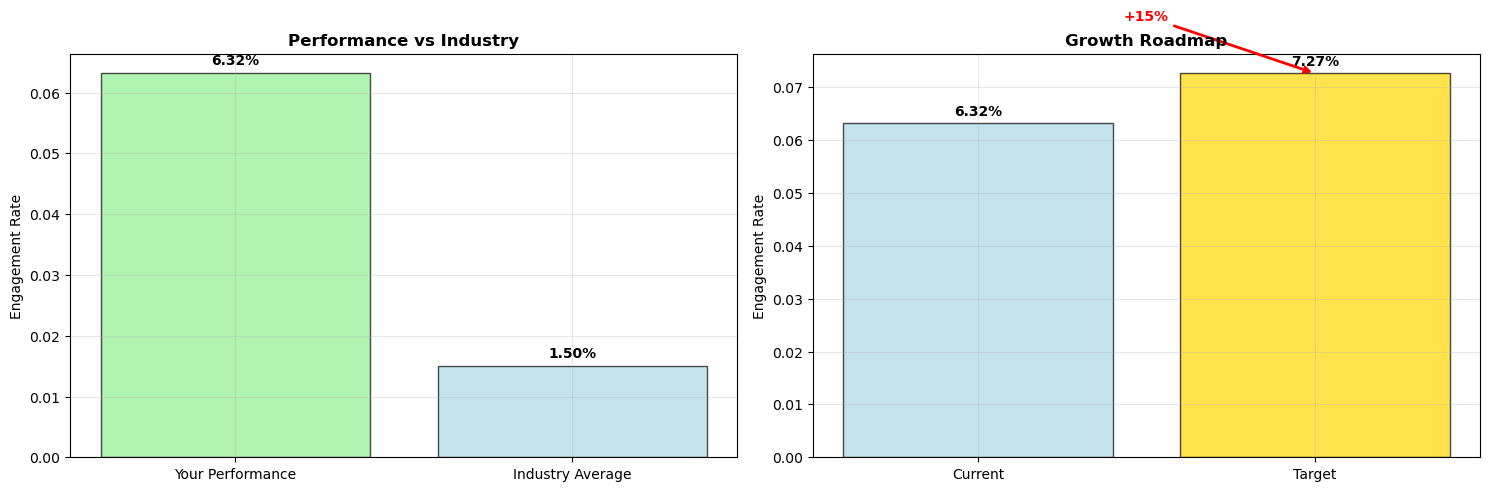

📊 Performance: 6.32% vs Industry 1.50%
🎯 Status: ✅ ABOVE Average

📋 ACTION PLAN:
• Medium captions (150-500 chars)
• 5-10 relevant hashtags
• Post at peak hours
• Create save-worthy content
• Use clear CTAs
• Weekly performance tracking

🎯 TARGET: 7.27% engagement (+15%)


In [12]:
# Strategic Recommendations with Visualization
avg_engagement = df['engagement_rate'].mean()
industry_avg = 0.015

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Performance Comparison
categories = ['Your Performance', 'Industry Average']
values = [avg_engagement, industry_avg]
colors = ['lightgreen' if avg_engagement > industry_avg else 'lightcoral', 'lightblue']

bars1 = ax1.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Engagement Rate')
ax1.set_title('Performance vs Industry', fontweight='bold')
ax1.grid(True, alpha=0.3)

for bar, value in zip(bars1, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.001, f'{value:.2%}', 
             ha='center', va='bottom', fontweight='bold')

# Growth Target
current = avg_engagement
target = avg_engagement * 1.15

bars2 = ax2.bar(['Current', 'Target'], [current, target], color=['lightblue', 'gold'], 
                alpha=0.7, edgecolor='black')
ax2.set_ylabel('Engagement Rate')
ax2.set_title('Growth Roadmap', fontweight='bold')
ax2.grid(True, alpha=0.3)

for bar, value in zip(bars2, [current, target]):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001, f'{value:.2%}', 
             ha='center', va='bottom', fontweight='bold')

ax2.annotate('+15%', xy=(1, target), xytext=(0.5, target + 0.01),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            ha='center', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# Recommendations
print(f"📊 Performance: {avg_engagement:.2%} vs Industry {industry_avg:.2%}")
print(f"🎯 Status: {'✅ ABOVE Average' if avg_engagement > industry_avg else '📈 BELOW Average'}")

print("\n📋 ACTION PLAN:")
actions = [
    "• Medium captions (150-500 chars)",
    "• 5-10 relevant hashtags", 
    "• Post at peak hours",
    "• Create save-worthy content",
    "• Use clear CTAs",
    "• Weekly performance tracking"
]

for action in actions:
    print(action)

print(f"\n🎯 TARGET: {(avg_engagement * 1.15):.2%} engagement (+15%)")

In [11]:
#  Save Results
df.to_csv('instagram_analysis.csv', index=False)
print("✅ Analysis saved successfully!")

✅ Analysis saved successfully!
